#Lab2:Identify one domain for your advanced data analytics lab.

#DOMAIN IS MEDICAL SECTOR


## Explore any two Text classification/clustering techniques with TF-IDF and N-Gram.

### a) Compare traditional approach vs modern approach for Text classification/Clustering

### b) Give your observation on Text classification with and without TF-IDF/ N-Gram

# WORKING ON THE Patient Comments and Specialist Types Dataset
#DATASET SOURCE : https://data.mendeley.com/datasets/2twgjzpn82/1

# Descibe about the Patient Comments and Specialist Types Dataset

# these source contain 3 types
# doctor_type.txt which contain key:values align type of pain and specialist medical name

# test_data.csv
# HealthCare Data.cvs

## Datasets Overview
HealthCare dataset: Contains patient comments and categories (like "Emotional pain")

test_Data dataset: Similar structure with patient comments and categories

Doctor types dataset: Maps pain types (typeofpain) to medical specialists

<!-- https://wandb.ai/landa-srinija-christ-university?newUser=true -->

<!-- landa-srinija-christ-university -->

In [ ]:
#import the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# read the files
HealthCareData=pd.read_csv("/content/HealthCare Data.csv",encoding='latin-1')
# doctor_type=pd.read_csv("/content/doctor_types.txt",sep=":",header=None)
test_data=pd.read_csv("/content/Test_data.csv")



FileNotFoundError: [Errno 2] No such file or directory: '/content/HealthCare Data.csv'

In [ ]:
print("File preview:")
with open("/content/doctor_types.txt", "r", encoding="utf-8") as file:
    for _ in range(5):
        print(file.readline().strip())


In [ ]:
import pandas as pd
import re

# Step 1: Clean and parse the file
data = []
with open("/content/doctor_types.txt", "r", encoding="utf-8") as file:
    for line in file:
        line = line.strip()
        if not line or line == "doctor_types =":  # Skip empty lines and header
            continue

        # Remove trailing comma if exists and extract key-value pair
        line = line.rstrip(',')
        match = re.match(r"\s*'([^']+)'\s*:\s*'([^']+)'", line)
        if match:
            typeofpain, specialist = match.groups()
            data.append([typeofpain, specialist])

# Step 2: Create DataFrame and save as CSV
df = pd.DataFrame(data, columns=['typeofpain', 'specialist'])
df.to_csv("/content/doctor_types_clean.csv", index=False)

print("Conversion successful! First 5 rows:")
print(df.head())

Conversion successful! First 5 rows:
         typeofpain      specialist
0    Emotional pain    Psychiatrist
1  Hair falling out   Dermatologist
2       Heart hurts    Cardiologist
3    Infected wound         Surgeon
4         Foot ache  Rheumatologist


In [ ]:
print(df)

            typeofpain                          specialist
0       Emotional pain                        Psychiatrist
1     Hair falling out                       Dermatologist
2          Heart hurts                        Cardiologist
3       Infected wound                             Surgeon
4            Foot ache                      Rheumatologist
5        Shoulder pain  Rheumatologist/Gastro-enterologist
6   Injury from sports                      Rheumatologist
7           Skin issue                       Dermatologist
8         Stomach ache                 Gastro-enterologist
9            Knee pain                         Orthopedist
10          Joint pain                         Orthopedist
11      Hard to breath                       Respirologist
12           Head ache     Neurologist/Gastro-enterologist
13     Body feels weak                  General Physicians
14       Feeling dizzy                  General Physicians
15           Back pain                         Orthopedi

In [ ]:
print(test_data)

                                       Patient_comment    Patient_Category
0                    I have muscle pain in my left leg       Shoulder pain
1    I have cut my finger because of playing footba...  Injury from sports
2    I have acne in my face and other problems in m...          Skin issue
3                      I have a strange rash on my arm           Foot ache
4             I have a sharp pain in my lower stomach.        Stomach ache
..                                                 ...                 ...
199                  I feel dizzy whenever I stand up.       Feeling dizzy
200  Annoyance starts suddenly, often after an inju...           Knee pain
201               I feel pain in my eyes I can see fog       Blurry vision
202                                   Can't keep focus           Head ache
203       I feel fluid trying to come up when I cough.               Cough

[204 rows x 2 columns]


In [ ]:
print(HealthCareData)

                                        Patient_comment  Patient_Category
0                       When I remember her I feel down    Emotional pain
1     When I carry heavy things I feel like breaking...  Hair falling out
2             there is too much pain when i move my arm       Heart hurts
3     My son had his lip pierced and it is swollen a...    Infected wound
4                My muscles in my lower back are aching    Infected wound
...                                                 ...               ...
6656  I feel a burning sensation in my guts about 2 ...      Stomach ache
6657     I have a split on my thumb that will not heal.        Open wound
6658                I feel a lot of pain in the joints.        Joint pain
6659        The area around my heart doesn't feel good.       Heart hurts
6660                  I complain alot with skin allergy        Skin issue

[6661 rows x 2 columns]


## Text Classification for Healthcare Data (Traditional vs. Modern Approaches)


## Traditional Approach: TF-IDF + N-Grams + Classic ML (SVM, Random Forest)

## Modern Approach: Deep Learning (BERT, LSTM)

##**Patient_comment** contains Text describing
##**Patient_category** -> label like shoulder pain

#are the above dataset for HealthCareDate,test_Data

# for df dataset
##**typeofpain** -->Patient_category
##specialist -->target class

In [ ]:
print(HealthCareData.sample(5))

print(test_data.sample(5))

                                        Patient_comment Patient_Category
4736  My face has broken out in painful red spots an...             Acne
853                                i can hardly breathe   Hard to breath
4126                 can't do any exercise, i feel weak  Body feels weak
3769  My son had his lip pierced and it is swollen a...   Infected wound
5255  The pain in my back dwwls like a sharp knife i...        Back pain
                                       Patient_comment  Patient_Category
87   surgical wounds red, firing pus, painful and h...    Infected wound
168               I feel pain in the knee when walking         Knee pain
81                         My foot is hurting so much.         Foot ache
167  When I brush my hair I notice big clumps of ha...  Hair falling out
15                  i feel dizzy after severe diarrhea     Feeling dizzy


#2. Text Classification Technique
#using Traditional approach ML(TF-IDF+N-GRAMS)
#using SVM

# text preprocessing

In [ ]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (run once)
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove special chars/numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning
HealthCareData['cleaned_text'] = HealthCareData['Patient_comment'].apply(clean_text)


test_data['cleaned_text'] = test_data['Patient_comment'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
HealthCareData

,Patient_comment,Patient_Category,cleaned_text
0,When I remember her I feel down,Emotional pain,remember feel
1,When I carry heavy things I feel like breaking...,Hair falling out,carry heavy thing feel like breaking back
2,there is too much pain when i move my arm,Heart hurts,much pain move arm
3,My son had his lip pierced and it is swollen a...,Infected wound,son lip pierced swollen skin inside lip grey l...
4,My muscles in my lower back are aching,Infected wound,muscle lower back aching
...,...,...,...
6656,I feel a burning sensation in my guts about 2 ...,Stomach ache,feel burning sensation gut hour meal
6657,I have a split on my thumb that will not heal.,Open wound,split thumb heal
6658,I feel a lot of pain in the joints.,Joint pain,feel lot pain joint
6659,The area around my heart doesn't feel good.,Heart hurts,area around heart doesnt feel good


In [ ]:
HealthCareData['cleaned_text']

,cleaned_text
0,remember feel
1,carry heavy thing feel like breaking back
2,much pain move arm
3,son lip pierced swollen skin inside lip grey l...
4,muscle lower back aching
...,...
6656,feel burning sensation gut hour meal
6657,split thumb heal
6658,feel lot pain joint
6659,area around heart doesnt feel good


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# TF-IDF with uni/bi-grams
tfidf = TfidfVectorizer(ngram_range=(1,2), stop_words='english')

print("the tdif is :",tfidf)
X_train = tfidf.fit_transform(HealthCareData['Patient_comment'])

print("The X-train independent variable is:",X_train)

y_train = HealthCareData['Patient_Category']
print("The y-train dependent/target variable is:",y_train)


# Train SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Evaluate
X_test = tfidf.transform(test_data['Patient_comment'])

print("The X-test independent variable is:",X_test)
y_pred = svm.predict(X_test)

print("The y_predict variable are:",y_pred)

the tdif is : TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
The X-train independent variable is: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 53593 stored elements and shape (6661, 3019)>
  Coords	Values
  (0, 2180)	0.6876997940113676
  (0, 832)	0.23267571130963652
  (0, 2181)	0.6876997940113676
  (1, 832)	0.12720426850428973
  (1, 335)	0.3154231841639278
  (1, 1209)	0.2589910714049317
  (1, 2636)	0.2968392152762215
  (1, 1562)	0.18479687485487206
  (1, 258)	0.34722119950687563
  (1, 337)	0.35236215876689375
  (1, 1215)	0.35236215876689375
  (1, 2638)	0.35236215876689375
  (1, 867)	0.23919841798235905
  (1, 1565)	0.380436317761487
  (2, 1886)	0.2640460459679133
  (2, 122)	0.5374086485982177
  (2, 1890)	0.8009192406357509
  (3, 2401)	0.1911007206866206
  (3, 1612)	0.4488990221666691
  (3, 2001)	0.22444951108333455
  (3, 2602)	0.18934988356107646
  (3, 2351)	0.14014705878319636
  (3, 1369)	0.1635127015157439
  (3, 1079)	0.24128956772976143
  (3, 1634)	0.19110

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Uni-grams and Bi-grams
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train = tfidf.fit_transform(HealthCareData['cleaned_text'])

print("The X-train independent variable is:",X_train)
y_train = HealthCareData['Patient_Category']

print("The y_train dependent Variable is :",y_train)

X_test = tfidf.transform(test_data['cleaned_text'])
y_test = test_data['Patient_Category']

The X-train independent variable is: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 62031 stored elements and shape (6661, 3317)>
  Coords	Values
  (0, 2378)	0.6899268154078521
  (0, 943)	0.21909353884211039
  (0, 2379)	0.6899268154078521
  (1, 943)	0.11070204945041295
  (1, 435)	0.29246452738400075
  (1, 1371)	0.24013992977686047
  (1, 2905)	0.2666915948210622
  (1, 1746)	0.1713460943263514
  (1, 315)	0.32194806567772133
  (1, 169)	0.1831650167822029
  (1, 438)	0.32671483075958097
  (1, 1378)	0.32671483075958097
  (1, 2907)	0.32671483075958097
  (1, 979)	0.19434993363785494
  (1, 1748)	0.3527455604404717
  (1, 316)	0.3527455604404717
  (2, 1945)	0.32653812330041
  (2, 2092)	0.1602376965300467
  (2, 1930)	0.3344982126293155
  (2, 145)	0.3148101770047656
  (2, 1949)	0.48989593297608647
  (2, 2137)	0.48989593297608647
  (2, 1931)	0.4203643450046542
  (3, 2654)	0.19181310674465288
  (3, 1790)	0.450572429800648
  :	:
  (6658, 943)	0.169600667455107
  (6658, 2092)	0.179038948

#MODEL TRAINING (SVM)

In [ ]:
# Train SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Evaluate
X_test = tfidf.transform(test_data['Patient_Category'])

print("The X-test independent variable is:",X_test)
y_pred = svm.predict(X_test)

print("The y_predict variable are:",y_pred)

The X-test independent variable is: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 533 stored elements and shape (204, 3317)>
  Coords	Values
  (0, 2092)	0.34353182738210647
  (0, 2527)	0.5598975333589977
  (0, 2538)	0.7539898114126083
  (1, 1552)	1.0
  (2, 1584)	0.8465072620766962
  (2, 2580)	0.5323771738639962
  (3, 15)	0.4807016174407569
  (3, 1081)	0.5208215483990023
  (3, 1082)	0.7054579149127934
  (4, 15)	0.48466529490321547
  (4, 2781)	0.5241207573442287
  (4, 2782)	0.700283502331228
  (5, 1641)	0.5028846296405763
  (5, 1653)	0.8055523287815689
  (5, 2092)	0.3133568171683065
  (6, 1354)	1.0
  (7, 1609)	0.5621798325931296
  (7, 1616)	0.7662592252077141
  (7, 2092)	0.3111280051837738
  (8, 1354)	1.0
  (9, 323)	0.724590590939382
  (9, 1292)	0.6891795669650379
  (10, 323)	0.724590590939382
  (10, 1292)	0.6891795669650379
  (11, 15)	0.4601883597191085
  :	:
  (195, 830)	0.6858412320680479
  (195, 831)	0.6858412320680479
  (195, 2092)	0.24340010022751454
  (196, 1641)	0

# Evalution metrics

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                    precision    recall  f1-score   support

              Acne       1.00      1.00      1.00         9
         Back pain       1.00      1.00      1.00        10
     Blurry vision       1.00      1.00      1.00        10
   Body feels weak       0.38      1.00      0.55         8
             Cough       1.00      1.00      1.00         6
          Ear ache       1.00      1.00      1.00         8
    Emotional pain       1.00      1.00      1.00         7
      Feeling cold       1.00      1.00      1.00         2
     Feeling dizzy       0.00      0.00      0.00        13
         Foot ache       1.00      1.00      1.00         9
  Hair falling out       1.00      1.00      1.00         7
    Hard to breath       1.00      1.00      1.00         5
         Head ache       1.00      1.00      1.00         8
       Heart hurts       1.00      1.00      1.00         9
    Infected wound       1.00      1.00      1.00        10
Injury from sports       1.00      1.00

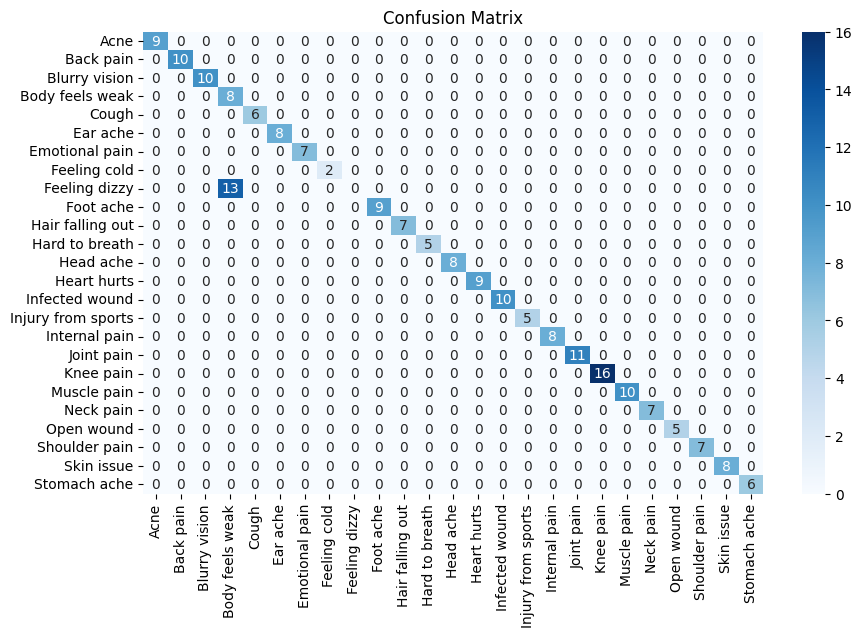

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predictions
y_pred = svm.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=svm.classes_,
            yticklabels=svm.classes_)
plt.title('Confusion Matrix')
plt.show()

# with MODERN APPROACH

#USING BERT TRANSFORMER

In [ ]:
from transformers import pipeline
bert_classifier = pipeline("text-classification", model="bert-base-uncased")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


#Step 1: Prepare Data for BERT
# FOR ENCODE LABEL AS numeric formate
#tokens format

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to numerical IDs
le = LabelEncoder()
y_train_num = le.fit_transform(HealthCareData['Patient_Category'])
y_test_num = le.transform(test_data['Patient_Category'])

# verify mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'Acne': np.int64(0), 'Back pain': np.int64(1), 'Blurry vision': np.int64(2), 'Body feels weak': np.int64(3), 'Cough': np.int64(4), 'Ear ache': np.int64(5), 'Emotional pain': np.int64(6), 'Feeling cold': np.int64(7), 'Feeling dizzy': np.int64(8), 'Foot ache': np.int64(9), 'Hair falling out': np.int64(10), 'Hard to breath': np.int64(11), 'Head ache': np.int64(12), 'Heart hurts': np.int64(13), 'Infected wound': np.int64(14), 'Injury from sports': np.int64(15), 'Internal pain': np.int64(16), 'Joint pain': np.int64(17), 'Knee pain': np.int64(18), 'Muscle pain': np.int64(19), 'Neck pain': np.int64(20), 'Open wound': np.int64(21), 'Shoulder pain': np.int64(22), 'Skin issue': np.int64(23), 'Stomach ache': np.int64(24)}


#FINE -TINE BERT MODEL

In [ ]:
from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    Trainer,
    TrainingArguments,
    EvalPrediction
)
import torch
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder (same as before)
le = LabelEncoder()
y_train_num = le.fit_transform(HealthCareData['Patient_Category'])
y_test_num = le.transform(test_data['Patient_Category'])

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Dataset class
class HealthcareDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        # Ensure texts is a list of strings
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = HealthcareDataset(HealthCareData['cleaned_text'], y_train_num, tokenizer)
eval_dataset = HealthcareDataset(test_data['cleaned_text'], y_test_num, tokenizer)

# Metric function
def compute_metrics(p: EvalPrediction):
    preds = np.argmax(p.predictions, axis=1)
    return {'accuracy': accuracy_score(p.label_ids, preds)}

# Model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(le.classes_),
    ignore_mismatched_sizes=True  # Handles dimension mismatches
)

# updated TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

# Train!
trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: landa-srinija (landa-srinija-christ-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,1.046200,0.247120,0.955882
2,0.016500,0.249024,0.965686


Epoch,Training Loss,Validation Loss,Accuracy
1,1.046200,0.247120,0.955882
2,0.016500,0.249024,0.965686
3,0.023000,0.221057,0.965686


TrainOutput(global_step=2499, training_loss=0.23427571368818523, metrics={'train_runtime': 7382.4616, 'train_samples_per_second': 2.707, 'train_steps_per_second': 0.339, 'total_flos': 184880882279988.0, 'train_loss': 0.23427571368818523, 'epoch': 3.0})

#Compare with TF-IDF results:

In [ ]:
print("TF-IDF + SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("BERT Accuracy:", accuracy_score(y_test, y_pred_labels))

NameError: name 'y_pred_svm' is not defined

#log_history = trainer.state.log_history
# Plot training/validation accuracy over epochs